Expanding on [M. C. Arnesen, S. Bose, and V. Vedral - " "Natural Thermal and Magnetic Entanglement in the 1D Heisenberg Model". Phys. Rev. Let. vol. 87 (2001)]

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl

from Hamiltonians import Hamiltonians
from Entanglement import Entanglement

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.frameon'] = True
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

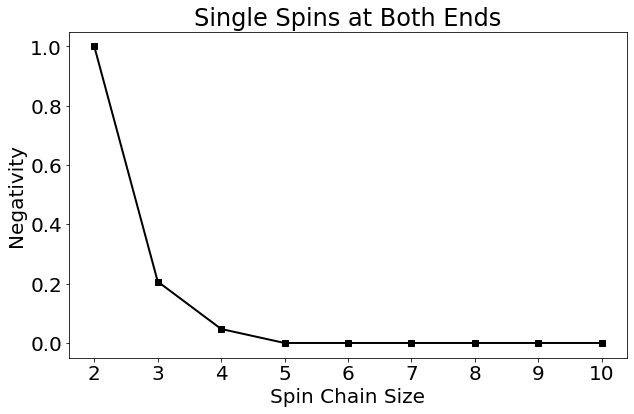

In [2]:
def ground_state():
    gamma = 0
    J = 1
    B = 0

    Nrange = [2,3,4,5,6,7,8,9,10]
    negativity = []

    for N in Nrange:
        hams = Hamiltonians(N=N)

        H = hams.XY_hamiltonian(gamma=gamma, J=J, B=B)

        ent = Entanglement()
        
        GS = ent.ground_state(H)
        rho = ket2dm(GS)

        ent = Entanglement()
        pac = ent.get_partial_trace(rho=rho, num_spins=[1, N-2, 1], trace_out_sys='b')
        pac_ta = ent.get_partial_transpose(rho=pac, mask=[1, 0], method="sparse")
        negativity.append(ent.negativity(pac_ta))

    plt.plot(Nrange, negativity, 's-', color='k')
    plt.xlabel('Spin Chain Size')
    plt.ylabel('Negativity')
    plt.title('Single Spins at Both Ends')
    plt.show()

if __name__=='__main__':
    ground_state()

In [19]:
from scipy.sparse.linalg import eigs
def ground_state(H=[]):
    Ene, Vec = eigs(H,2)
    GS = Vec[:,1]
    return Qobj(GS, type='Ket')

def thermal_state(H=[], T=1, K=1, sys='b', dims=[]):
    ent = Entanglement()

    dimA = dims[0]
    dimB = dims[1]
    dimC = dims[2]

    beta = 1/(K*T)
    Ene, Vec = eigs(H)

    Z = np.sum(np.exp(-Ene * beta))
    Prob = (1/Z) * np.exp(-Ene * beta)

    thermal = np.zeros((dimA*dimC, dimA*dimC), dtype='float')
    thermal = Qobj(thermal, dims=[[2,2], [2,2]])

    for num in range(0,len(Ene)):
        psi = Qobj(Vec[:,num], type='ket')
        rho = ket2dm(psi)
        rho_tr = ent.get_partial_trace(rho=rho, num_spins=[1, N-2, 1], trace_out_sys='b')
        thermal = thermal + Prob[num]*rho_tr
    return thermal

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl

from Hamiltonians import Hamiltonians
from Entanglement import Entanglement

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.frameon'] = True
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

def run_thermal_state_sweep():

    gamma = 0
    J = 1
    B = 0

    negativity = []
    N = 3

    hams = Hamiltonians(N=N)
    H = hams.XY_hamiltonian(gamma=gamma, J=J, B=B)

    ent = Entanglement()
    dims = [2,2,2]
    tvec = np.arange(0.1,2.1,0.1)

    negativity = []
    for t in tvec:
        rho_th = ent.thermal_state(H=H, T=t, K=1, sys='b', N=N, dims=dims)
        print(rho_th.shape)
        pac_ta = ent.get_partial_transpose(rho=rho_th, mask=[1, 0], method="sparse")
        negativity.append(ent.negativity(pac_ta))

    plt.plot(tvec, negativity, 's-', color='k')
    plt.xlabel('T/J')
    plt.ylabel('Negativity')
    # plt.title('Single Spins at Both Ends')
    plt.show()
    
if __name__=='__main__':
    run_thermal_state_sweep()

TypeError: get_partial_trace() got an unexpected keyword argument 'num_spins'

In [11]:
from qutip import *

tensor(identity(2), identity(2)).shape > (1, 1)

False